# TE Image processing

Import the necessary modules and activate inline plotting.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define two functions for displaying images and plotting histograms.

In [2]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')

In [3]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(194, 192, 3)


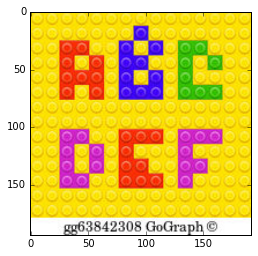

In [24]:
img = cv2.imread("abc.jpg")
print(img.shape)
show(img)

Croping right top corner of abc.jpg image

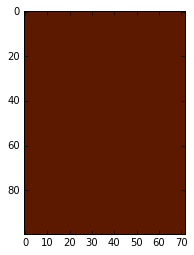

In [25]:
img5 = cv2.imread("abc.jpg")
corner = img5 [0:100, 120:194]
img5 [0:100, 120:194] = (0,25,92)
show(corner)

Translate image by (40, 60) and show

In [40]:
def translate(img, tx, ty):
    M= np.float32([[1, 0, tx],[0, 1, ty]])
    img7 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    show(img7)

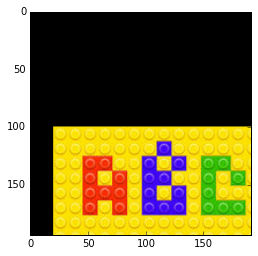

In [41]:
translate(img, 20, 100)

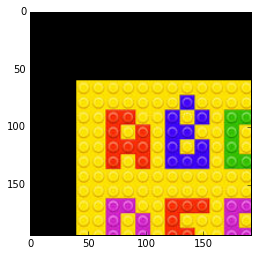

In [39]:
M= np.float32([[1, 0, 40],[0, 1, 60]])
img2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
show(img2)

Rotate the output by 45° and show

Flip the previos result horizontally and show

## 7 Histograms

Transform to gray-scale image and show

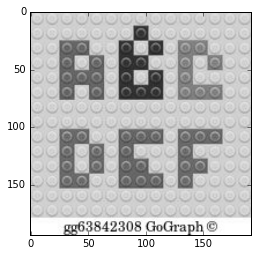

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a histogram

In [28]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

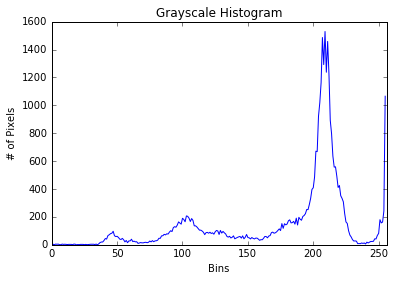

In [29]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

What is the region around
- 50 letter b
- 100 other letters
- 200 it is the yellow part
- 250 the footer of the image

Place a red rectangle around letter C

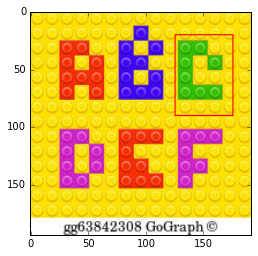

In [30]:
img3 = img.copy()
cv2.rectangle(img3, (125, 20), (175, 90), (0, 0, 255))
show(img3)

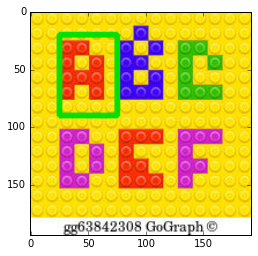

In [31]:
img4 = img.copy()
cv2.rectangle(img4, (25, 20), (75,90), (0,225,2),4)
show(img4)

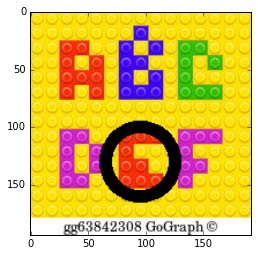

In [38]:
img6 = cv2.imread("abc.jpg")
cv2.circle(img6, (95, 130), 30, (0,0,0), 10)
show(img6)

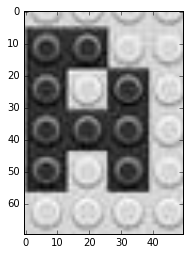

In [32]:
letter_A = gray[20:90, 25:75]
show(letter_A)

In [ ]:
hist_A = cv2.calcHist([letter_A], [0], None, [256], [0, 256])
histogram(hist_A, "Letter A")

## 8 Smoothing

In [ ]:
show(img)

In [ ]:
img2 = img[0:100, :, :]
print(img2.shape)
show(img2)

Show 3 horizontally stacked blurred images with a blur size of 3, 5, 7

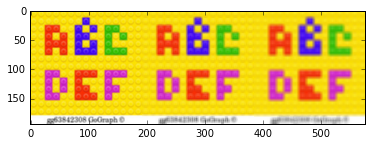

In [35]:
blurred = np.hstack([
    cv2.blur(img, (3,3)),
    cv2.blur(img, (5,5)),
    cv2.blur(img, (7,7))
])
show(blurred)

## 9 Thresholding

Transform into grayscale and select appropriate binary threshold, based on previous histogram, to show the letters in black.

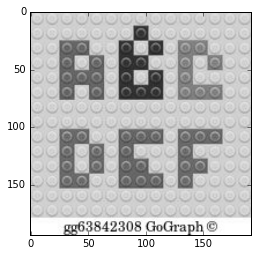

In [37]:
show(gray)

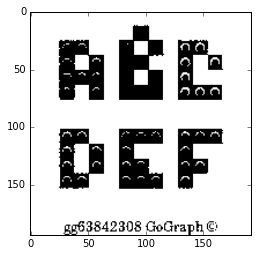

In [41]:
(T, thresh) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
show(thresh)

Show the letters in white (THRESH_BINARY_INV).

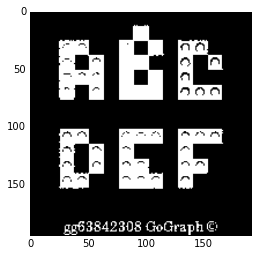

In [42]:
(T, thresh2) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
show(thresh2)

## 10 Edge detection

Blur the grayscale image by (5,5), then use Canny edge detection and show the result.

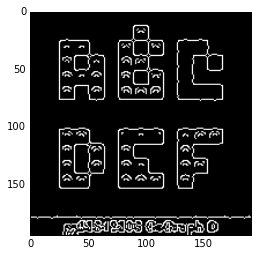

In [64]:
gray2 = cv2.blur(gray, (3, 3))
canny = cv2.Canny(gray2, 100, 150)
show(canny)

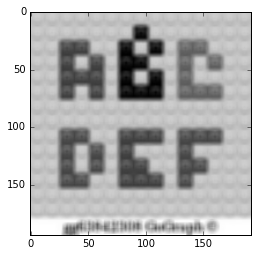

In [47]:
show(gray2)

## 11 Contours

Only use the top 170 pixels

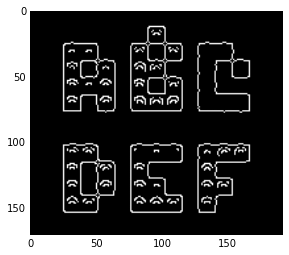

In [66]:
canny2 = canny[0:170, :]
show(canny2)

In [89]:
(_, cnts, _) = cv2.findContours(canny2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))

6
